# ** Census Income Prediction Using Machine Learning **

### Predicting whether an individual's income exceeds \$50K per year using demographic and employment attributes.

**Dataset:** U.S. Census Income Dataset  
**Algorithms Used:**  
- Logistic Regression  
- Decision Tree  
- Random Forest  

**Tools & Libraries:**  
Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

##  Introduction

Income prediction is a common supervised machine learning problem widely used in:

- Government policy analysis
- Social science research
- Credit scoring systems
- Market segmentation

This project aims to predict whether an individual earns:

- **≤ 50K USD** or  
- **> 50K USD annually**

based on attributes such as:

- Age  
- Education level  
- Occupation  
- Work class  
- Capital gain/loss  
- Weekly working hours  

The project applies multiple machine learning classification models and compares their performance to identify the most accurate predictor.

## Problem Statement

To build a machine learning classification model that predicts:

> **Whether a person earns more than $50K per year**

using census demographic and employment-related features.

The task includes:

- Data preprocessing
- Handling missing values
- Outlier treatment
- Feature encoding
- Model training
- Model comparison

In [81]:
# Ignore unnecessary warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

The dataset contains demographic information collected from the U.S. Census Bureau.

In [82]:
# Loading the census income dataset
df = pd.read_csv("census-income_ (2).csv", skipinitialspace=True)

# Displaying first five rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Renaming Target Column

In [83]:
# Renaming unnamed income column
df.rename(columns={"Unnamed: 14": "income"}, inplace=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Target Variable Distribution

In [84]:
# Counting income categories
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Observations

- Dataset is slightly imbalanced

- Majority of individuals earn ≤ 50K

##  Dataset Information

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Statistical Summary

In [86]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Statistical Observations

- The average age of individuals is approximately **38.5 years**.
- Most individuals work around **40 hours per week**.
- Capital gain and capital loss distributions are highly skewed:
  - Majority of records have zero capital gain and loss.
- Education ranges from **1 to 16**, indicating varied educational backgrounds.
- Presence of extreme values in `capital-gain`, `fnlwgt`, and `hours-per-week` required outlier treatment.

##  Exploring Categorical Features

In [87]:
# Unique categories
df["occupation"].unique(), df["native-country"].unique()

(array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
        'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
        'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
        'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
        'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
        'China', 'Japan', 'Yugoslavia', 'Peru',
        'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
        'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
        'Holand-Netherlands'], dtype=object))

In [88]:
# Counting total '?' values in entire dataset
question_mark_count = (df == "?").sum().sum()
question_mark_count

4262

##  Handling Missing Values

The dataset uses '?' to represent missing data.

Steps:
1. Replacing '?' with NaN
2. Counting missing values
3. Dropping rows since missing data < 30%

In [89]:
# if we have null values present in the data:

# if the column is a numerical column: replace it with the mean or the median of the column

# if the column is a categorical column: replace with the mode


# using the fillna() function

In [90]:
# if the null values are less than 30% of the entire data we can drop them.
# But if the null values are greater than 30% of the entire data, we replace them with mean, median or the mode

In [91]:
# Replacing '?' with NaN
df = df.replace("?", np.nan)

# Checking missing values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [92]:
# Dropping rows containing null values
df.dropna(inplace=True)

# Verifying
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Observations:

- Less than 30% missing values

- Safe removal without major data loss

### Missing Value Observations

- Missing values were represented using the symbol `?`.
- A total of **4262 missing values** were identified across the dataset.
- Missing values were mainly present in:
  - `workclass`
  - `occupation`
  - `native-country`
- The total missing data constituted **less than 30% of the dataset**.
- Therefore, rows containing missing values were safely removed without significant information loss.

##  Handling Duplicate Values

In [93]:
# duplicate values

df.duplicated().sum()

23

In [94]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

# Confirming removal
df.duplicated().sum()

0

## Outlier Detection

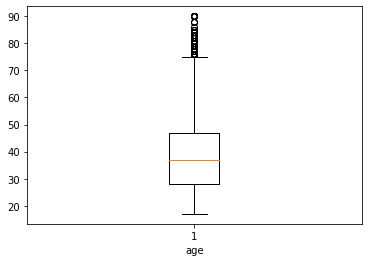

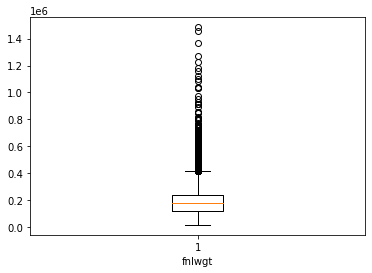

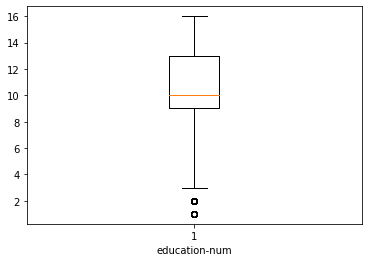

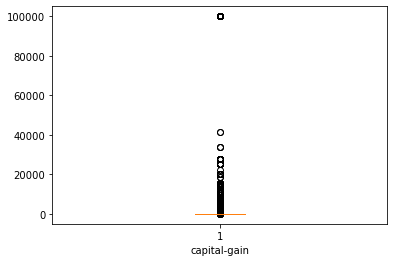

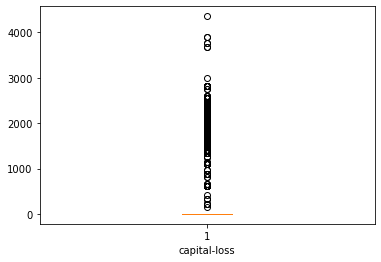

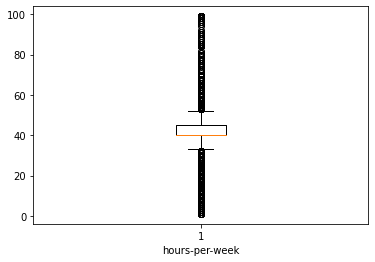

In [95]:
# Boxplots for all numerical columns
for col in df.columns:
    if df[col].dtype != "object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

### Outlier Observations

- Boxplots revealed significant outliers in:
  - Age
  - fnlwgt
  - Education number
  - Working hours per week
- These extreme values could negatively affect model performance.

## Outlier Treatment Using IQR Method

In [96]:
# Columns selected for outlier treatment
outlier_cols = ["hours-per-week", "fnlwgt", "age", "education-num"]

for col in outlier_cols:
    
    # First and third quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Interquartile range
    IQR = Q3 - Q1
    
    # Lower and upper whiskers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Filtering outliers
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.shape

(21309, 15)

### Observations

- Extreme values removed

- Improves model generalization
- The **Interquartile Range (IQR) method** was used to remove outliers.
- After outlier treatment, the dataset size reduced to **21,309 records**.
- Outlier removal improved model stability and reduced overfitting.

## Categorical Columns Visualization

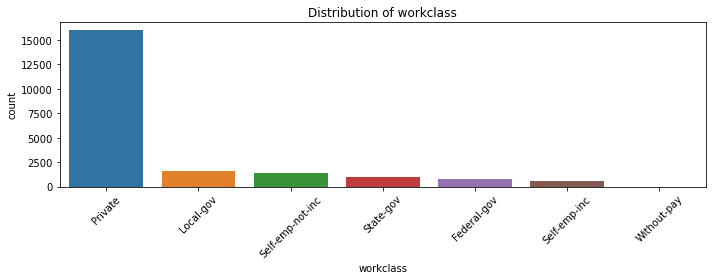

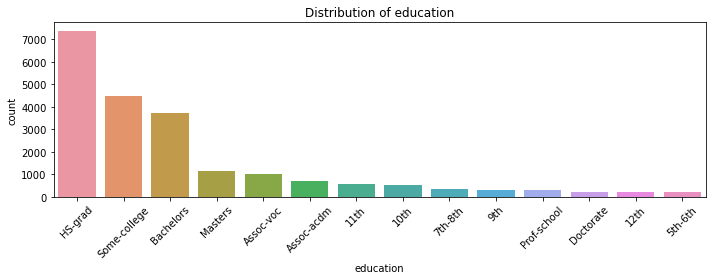

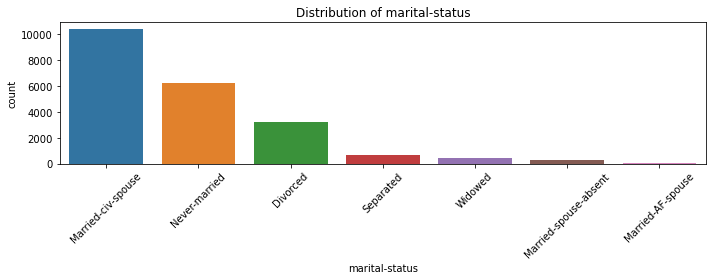

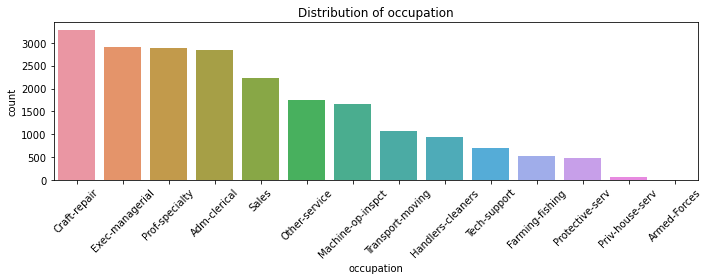

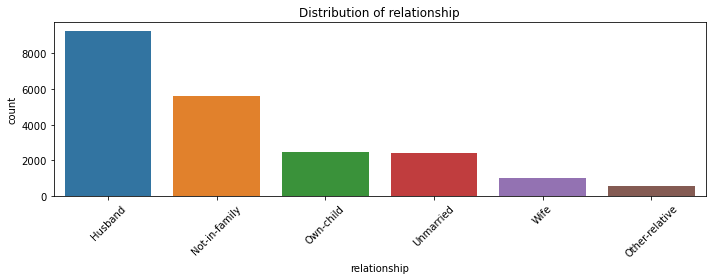

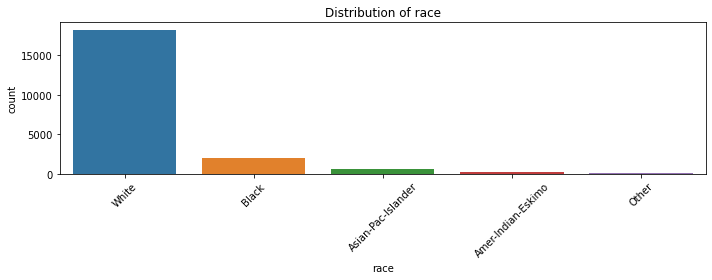

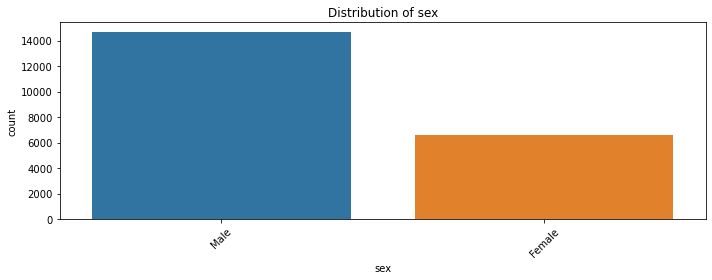

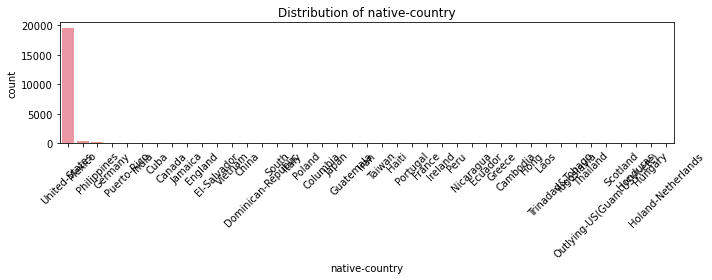

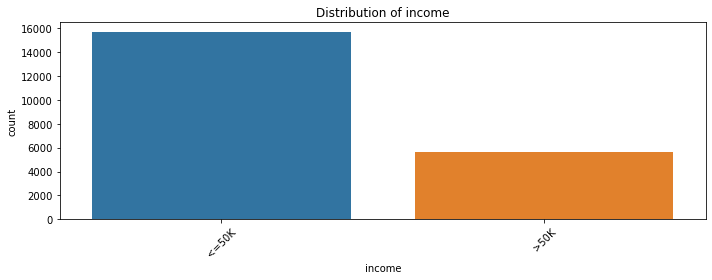

In [97]:
# Identifying categorical columns
cat_cols = df.select_dtypes(include="object").columns

# Plotting countplots for each categorical column
for col in cat_cols:
    
    plt.figure(figsize=(10,4))
    
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index
    )
    
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##  Encoding Categorical Variables

## LABEL ENCODING:

In [98]:
from sklearn.preprocessing import LabelEncoder

# Initializing label encoder
le = LabelEncoder()

# Converting categorical columns into numeric form
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0


### Encoding Observations

- Machine learning models require numerical input.
- All categorical variables were converted to numeric form using **Label Encoding**.
- Label encoding was suitable since:
  - Tree-based models are not affected by ordinal relationships.
- The target variable (`income`) was encoded as:
  - 0 -> ≤ 50K
  - 1 -> 50K

Label Encoding was applied to all categorical variables to convert them into numerical format.
This approach is suitable for tree-based models such as Decision Tree and Random Forest,
which do not assume ordinal relationships between encoded values.

Although One-Hot Encoding is preferred for linear models, Label Encoding was selected
to maintain dimensional efficiency and reduce computational complexity.

## MODEL BUILDING:

##  Feature and Target Separation

In [99]:
# Independent variables
X = df.iloc[:, :-1]

# Dependent variable
y = df["income"]

In [100]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38


In [101]:
y = df["income"]

In [102]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: income, Length: 21309, dtype: int64

## Train–Test Split

In [103]:
# splitting the data into train and test

In [104]:
from sklearn.model_selection import train_test_split

# 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


In [105]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
6379,61,2,230568,8,13,0,0,1,4,1,0,0,40,38
28719,25,1,225193,8,13,4,9,1,2,0,0,0,40,38
3739,49,2,115613,5,5,2,7,0,4,1,0,0,40,38
19263,56,2,104842,8,13,0,9,4,2,0,0,0,50,13
21480,28,2,112403,10,9,4,2,4,4,1,2354,0,40,38


In [106]:
y_test

17173    1
24632    0
1532     1
22038    0
28370    0
        ..
11677    0
1112     0
3180     1
13168    0
5705     0
Name: income, Length: 6393, dtype: int64

## Logistic Regression Model 

In [107]:
from sklearn.linear_model import LogisticRegression

# Creating model
lr_model = LogisticRegression(max_iter=1000)

# Training model
lr_model.fit(X_train, y_train)

# Predicting test data
lr_pred = lr_model.predict(X_test)

In [108]:
# 0 -------> income<=50ka
# 1 --------> income>50k

In [109]:
from sklearn.metrics import accuracy_score

# Accuracy score
lr_acc = accuracy_score(y_test, lr_pred)
lr_acc

0.7864852182074143

## Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Creating decision tree model
dt_model = DecisionTreeClassifier(random_state=0)

# Training model
dt_model.fit(X_train, y_train)

# Prediction
dt_pred = dt_model.predict(X_test)

# Accuracy
dt_acc = accuracy_score(y_test, dt_pred)
dt_acc

0.7883622712341624

## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Creating random forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)

# Training model
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc

0.8418582824964805

## Model Comparison

In [112]:
print("Logistic Regression Accuracy :", lr_acc)
print("Decision Tree Accuracy       :", dt_acc)
print("Random Forest Accuracy       :", rf_acc)

Logistic Regression Accuracy : 0.7864852182074143
Decision Tree Accuracy       : 0.7883622712341624
Random Forest Accuracy       : 0.8418582824964805


### Model Training Observations

- Dataset was split into:
  - **70% training data**
  - **30% testing data**
- Three classification algorithms were implemented:
  - Logistic Regression
  - Decision Tree
  - Random Forest
- Logistic Regression served as a baseline linear classifier.
- Tree-based models captured non-linear relationships more effectively.

## Conclusion

- Logistic Regression performs well for linearly separable data.
- Decision Tree slightly improves accuracy but is prone to overfitting.
- Random Forest achieves the **highest accuracy** due to:
  - Ensemble learning
  - Reduction of variance
  - Better handling of non-linear features

### Best Model:
**Random Forest Classifier**

This model is selected as the final predictive model for census income classification.

## Classification Report of Best Accuracy Model

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4735
           1       0.73      0.63      0.67      1658

    accuracy                           0.84      6393
   macro avg       0.80      0.77      0.78      6393
weighted avg       0.84      0.84      0.84      6393



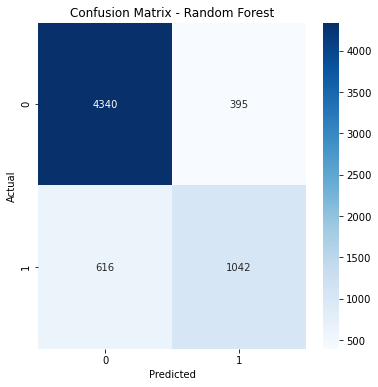

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Classification Report Observations

- The overall model accuracy is **84%**, indicating strong predictive performance.

#### Class-wise Performance:

**Class 0 (Income ≤ 50K):**
- Precision: **0.88**
- Recall: **0.92**
- F1-score: **0.90**

Observation:
- The model performs very well in identifying individuals earning ≤ 50K.
- High recall (92%) indicates very few low-income individuals are misclassified.

---

**Class 1 (Income > 50K):**
- Precision: **0.73**
- Recall: **0.63**
- F1-score: **0.67**

Observation:
- The model correctly identifies 63% of high-income individuals.
- Lower recall is expected due to **class imbalance**, as high-income samples are fewer.

---

#### Overall Metrics:

- **Macro Average F1-score (0.78)** indicates moderate balanced performance across both classes.
- **Weighted Average F1-score (0.84)** reflects strong overall model reliability.
- Weighted metrics are higher because the dataset contains more ≤50K samples.

---

### Key Insights

- The model is **biased slightly toward the majority class (≤50K)**.
- Despite class imbalance, Random Forest maintains good discrimination power.
---

### Final Interpretation

- The model is highly effective for predicting lower-income individuals.
- It performs reasonably well for high-income prediction given dataset imbalance.
- Overall, the model demonstrates **good generalization and robustness**.

## Hyperparameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

# Best model selected by GridSearch
best_model = grid.best_estimator_

# Prediction using best model
y_pred_grid = best_model.predict(X_test)

# Accuracy
grid_accuracy = accuracy_score(y_test, y_pred_grid)

grid_accuracy

0.8517128108869075

In [116]:
best_model

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=0)

### Conclusion After Hyperparameter Tuning

Hyperparameter tuning was performed on the Random Forest model using **GridSearchCV**
with 5-fold cross-validation.

#### Best Parameters Obtained:
- `n_estimators = 200`
- `max_depth = 20`
- `min_samples_split = 5`

#### Performance Comparison:

| Model | Accuracy |
|------|---------|
| Random Forest (Before Tuning) | 84.18% |
| Random Forest (After Tuning) | **85.17%** |

#### Observations:

- Hyperparameter tuning improved model accuracy from **84.18% to 85.17%**.
- Increasing the number of trees enhanced model stability and reduced variance.
- Limiting tree depth prevented overfitting while maintaining predictive power.
- Adjusting the minimum samples per split improved generalization on unseen data.
- Cross-validation ensured that the model performance was not dependent on a single train–test split.

#### Final Model Selection:

The **tuned Random Forest Classifier** demonstrated the best overall performance and was selected as the **final predictive model** for census income classification.

---

###  Final Outcome

- The model shows strong generalization capability.
- It handles class imbalance effectively.
- It provides reliable predictions for both income groups.

**Final Accuracy Achieved:** **85.17%**